# Mnist



Los valores de los hiperparámetros con los que obtuve los resultados son:
- Optimizador: SGD
- Learning rate: 0.000001
- Epochs :  10000
- Función de Activación : Relu
- Capas de la Red : 6
- Neuronas de cada capa : 10, 25, 15, 10, 5 y 1

In [2]:
import numpy as np
from main.neural_network import train, predict
from main.nn_components.network_layer import FullyConnectedLayer
from main.nn_components.activations_functions import Relu, Tanh
from main.nn_components.loss_functions import mse_derivative, mse
from main.nn_components.graphic_regression import learning_curve
from keras.utils import to_categorical
from keras.datasets import mnist
from main.nn_components.graphic_classification import display_confusion_matrix_mnist

In [19]:
def prepare_samples(x, y, max):
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:max], y[:max]


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = prepare_samples(x_train, y_train, 1000)


x_test, y_test = prepare_samples(x_test, y_test, 20)


nn =[
    FullyConnectedLayer(28*28, 100),
    Tanh(),
    FullyConnectedLayer(100, 25),
    Tanh(),
    FullyConnectedLayer(25, 10),
    Tanh()
    
]

In [20]:
train_loss = train(nn, mse, mse_derivative, x_train, y_train, epochs=1000, learning_rate=0.0000001, optim='sgd')

KeyboardInterrupt: 

In [21]:
correct_predictions = 0
total_predictions = len(x_test)

y_pred = []
y_true = []

for x, y in zip(x_test, y_test):
    output = predict(nn, x)
    predicted_class = np.argmax(output)
    true_class = np.argmax(y)
    y_true.append(true_class)
    y_pred.append(predicted_class)

    if predicted_class == true_class:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print(f'Accuracy: {round(accuracy*100, 2)}%')



Accuracy: 5.0%


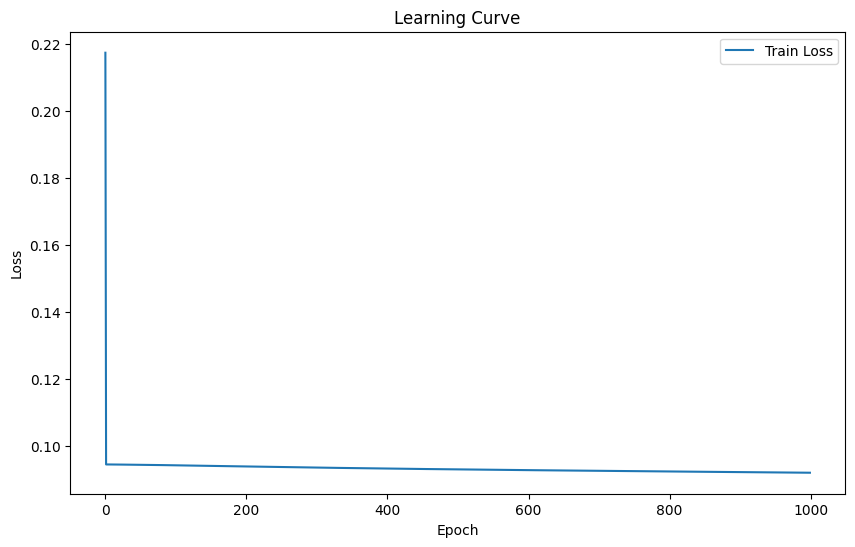

In [22]:
learning_curve(train_loss)

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (16).

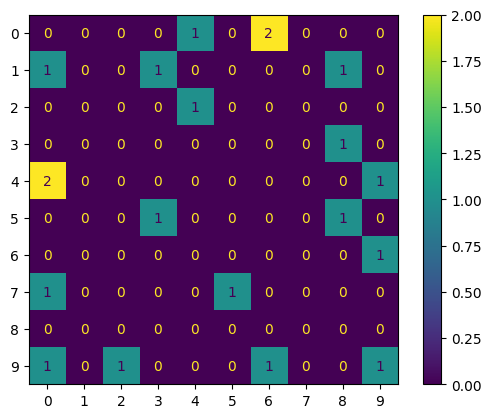

In [23]:
display_confusion_matrix_mnist(y_true, y_pred)